In [11]:
# sử dụng thư viện pandas để làm việc với dữ liệu dạng bảng
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# đọc dữ liệu, file dữ liệu thường có encoding = 'UTF-8' hoặc 'ISO-8859-1'
data = pd.read_csv('subset-covid-data.csv', encoding='UTF-8')

In [3]:
# hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [4]:
# Số lượng dòng và cột của bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [5]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

date
2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: count, dtype: int64

In [6]:
# lọc dữ liệu nhiễu:
cleaned_data = data[data['date']=='2020-04-12']

In [7]:
# trung bình, trung vị
print ("trung bình số ca mắc mới: " + str(cleaned_data.cases.mean()))
print ("trung vị của số ca mắc mới: "+ str(cleaned_data.cases.median()))

trung bình số ca mắc mới: 376.8186274509804
trung vị của số ca mắc mới: 11.5


Text(0, 0.5, 'Số lượng quốc gia')

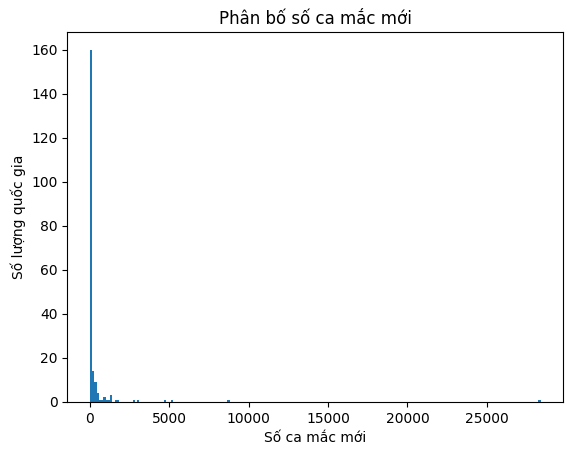

In [13]:
# Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia
plt.hist(cleaned_data.cases, bins = 200)
plt.title('Phân bố số ca mắc mới')
plt.xlabel("Số ca mắc mới")
plt.ylabel('Số lượng quốc gia')

có 50% quốc gia có số ca mắc mới <=11 ca, và có 50% quốc gia có số ca mắc mới >12 ca, nhưng giá trị trung bình = 376 lớn hơn rất nhiều so với 11.5 nên có một vài quốc gia có số ca mắc mới vô lớn, khác biệt hoàn toàn với các quốc gia còn lại
Nhìn vào biểu đồ phân bố: Hầu như tất cả các quốc gia (khoảng 160/206) có số lượng ca mắc mới rất nhỏ, còn lại một số quốc gia có số ca mắc mới lớn hơn hẳn, đặc biệt có quốc gia có số ca mắc mới > 25000

In [18]:
print("tổng số ca nhiễm và số ca tử vong của các châu lục")
cleaned_data.groupby('continent')[['cases','deaths']].sum()


tổng số ca nhiễm và số ca tử vong của các châu lục


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [19]:
print ("5 quốc gia có số ca nhiễm mới cao nhất")
data = data.sort_values('cases', ascending= False)
data.head()

5 quốc gia có số ca nhiễm mới cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [20]:
print ("5 quốc gia có số ca tử vong cao nhất")
data = data.sort_values('deaths', ascending= False)
data.head()

5 quốc gia có số ca tử vong cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
